# Network Dynamics And Learning - Homework I
## Alessandro Casella (S306081)
## s306081@studenti.polito.it
### Politecnico di Torino

In [1]:
# https://networkx.org/
import networkx as nx

import numpy as np

# https://docs.scipy.org/doc/scipy/reference/misc.html
import scipy.misc
# https://docs.scipy.org/doc/scipy/tutorial/io.html
from scipy import io

# https://www.cvxpy.org/
import cvxpy as cp

import matplotlib.pyplot as plt

# Exercise 1

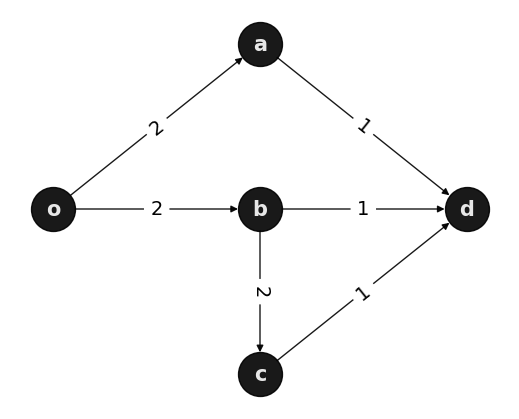

In [2]:
GG = nx.DiGraph()
GG.add_edge("o", "a", capacity=2)
GG.add_edge("o", "b", capacity=2)
GG.add_edge("a", "d", capacity=1)
GG.add_edge("b", "c", capacity=2)
GG.add_edge("b", "d", capacity=1)
GG.add_edge("c", "d", capacity=1)

pos = {'o': (40, 20), 'a': (60, 35), 'b': (60, 20), 'c': (60, 5), 'd': (80, 20)}

fig = plt.figure(figsize=(5,4))

nx.draw(GG, pos, with_labels = True, node_size=1000, node_color='black',
        font_color='white', font_weight='bold', font_size=15, alpha=0.9)

nx.draw_networkx_edge_labels(GG, pos, edge_labels={("o","a"):'2',
("o","b"):'2', ("a","d"):'1', ("b","c"):'2',
("b","d"):'1', ("c","d"):'1'}, font_color='black', font_size=14)

plt.savefig("e1.png", format="PNG")

## 1(a)

In [3]:
nx.algorithms.flow.maximum_flow(GG,'o','d')

(3,
 {'o': {'a': 1, 'b': 2},
  'a': {'d': 1},
  'b': {'c': 1, 'd': 1},
  'd': {},
  'c': {'d': 1}})

In [4]:
nx.algorithms.flow.minimum_cut(GG,'o','d')

(3, ({'a', 'b', 'c', 'o'}, {'d'}))

 The minimal capacity that needs to be removed equals the capacity of the min-cut of the network, which is 3.

# 1(b)

In [5]:
GG['o']['a']['capacity'] = 1
GG['o']['b']['capacity'] = 2
GG['b']['c']['capacity'] = 1

{('o', 'a'): Text(50.0, 27.5, '1'),
 ('o', 'b'): Text(50.0, 20.0, '2'),
 ('a', 'd'): Text(70.0, 27.5, '1'),
 ('b', 'c'): Text(60.0, 12.5, '1'),
 ('b', 'd'): Text(70.0, 20.0, '1'),
 ('c', 'd'): Text(70.0, 12.5, '1')}

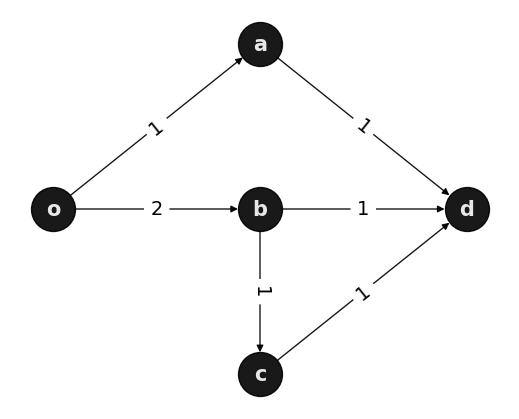

In [6]:
fig = plt.figure(figsize=(5,4))

nx.draw(GG, pos, with_labels = True, node_size=1000, node_color='black',
        font_color='white', font_weight='bold', font_size=15, alpha=0.9)

nx.draw_networkx_edge_labels(GG, pos, edge_labels={("o","a"):GG['o']['a']['capacity'],
("o","b"):GG['o']['b']['capacity'], ("a","d"):GG['a']['d']['capacity'], ("b","c"):GG['b']['c']['capacity'],
("b","d"):GG['b']['d']['capacity'], ("c","d"):GG['c']['d']['capacity']}, font_color='black', font_size=14)

In [7]:
nx.algorithms.flow.minimum_cut(GG,'o','d')

(3, ({'a', 'b', 'c', 'o'}, {'d'}))

## 1(c)

In [8]:
"""We have 6 edges in which we distribute a total of x
n=6 edges, M=x=3 for example
We know that we can make
(M+n-1) C (n-1) different distributions of capacities to the edges
(3+6-1) C (6-1) = 8 C 5 = 56
"""

from itertools import product

edges = ['oa', 'ob', 'ad', 'bd', 'bc', 'cd']
# The possible associations for when I put a capacity of x
# are accessible by associations[x-1]
associations = []

for x in np.arange(2,17): # np.arange(a,b) ->  a-1 <= x <= b-2
    poss_choices = np.arange(0,x) #1st: [0,1], 2nd: [0,1,2] ...
    # cartesian product
    all_combs = list(product(poss_choices, repeat=len(edges)))
    filtered_combs = []
    for row in all_combs:
        row_sum = 0
        for elem in row:
            row_sum += elem
        if row_sum == x-1:
            filtered_combs.append(row)
    poss_associations = list(list(zip(edges, element)) for element in filtered_combs)
    associations.append(poss_associations)

In [9]:
max_ths = []
for i, x in enumerate(associations):
    max_th = 0
    cut = tuple()
    for row in x:
        GG = nx.DiGraph()
        GG.add_edge("o", "a", capacity=2)
        GG.add_edge("o", "b", capacity=2)
        GG.add_edge("a", "d", capacity=1)
        GG.add_edge("b", "c", capacity=2)
        GG.add_edge("b", "d", capacity=1)
        GG.add_edge("c", "d", capacity=1)
        for edge, capacity in row:
            if capacity > 0:
                GG[edge[0]][edge[1]]['capacity'] = list(GG.get_edge_data(edge[0],edge[1]).values())[0] + capacity
        min_cut = nx.algorithms.flow.minimum_cut(GG,'o','d')
        throughput = min_cut[0]
        if throughput > max_th:
            oa=GG.get_edge_data("o", "a")
            ob=GG.get_edge_data("o", "b")
            ad=GG.get_edge_data("a", "d")
            bc=GG.get_edge_data("b", "c")
            bd=GG.get_edge_data("b", "d")
            cd=GG.get_edge_data("c", "d")
            max_th = throughput
            cut = min_cut[1]
    max_ths.append({i+1: max_th})
    print(f"--- Assigned x={i+1} extra units of capacity ---")
    print("New configuration of edges for maximum throughput:")
    print(f"- oa: {oa}")
    print(f"- ob: {ob}")
    print(f"- ad: {ad}")
    print(f"- bc: {bc}")
    print(f"- bd: {bd}")
    print(f"- cd: {cd}")
    print(f"Max throughput={max_th} obtained with cut {cut}")
    print("\n")

--- Assigned x=1 extra units of capacity ---
New configuration of edges for maximum throughput:
- oa: {'capacity': 2}
- ob: {'capacity': 2}
- ad: {'capacity': 2}
- bc: {'capacity': 2}
- bd: {'capacity': 1}
- cd: {'capacity': 1}
Max throughput=4 obtained with cut ({'b', 'a', 'o', 'c'}, {'d'})


--- Assigned x=2 extra units of capacity ---
New configuration of edges for maximum throughput:
- oa: {'capacity': 2}
- ob: {'capacity': 2}
- ad: {'capacity': 2}
- bc: {'capacity': 2}
- bd: {'capacity': 1}
- cd: {'capacity': 2}
Max throughput=4 obtained with cut ({'a', 'o'}, {'d', 'b', 'c'})


--- Assigned x=3 extra units of capacity ---
New configuration of edges for maximum throughput:
- oa: {'capacity': 2}
- ob: {'capacity': 3}
- ad: {'capacity': 2}
- bc: {'capacity': 2}
- bd: {'capacity': 1}
- cd: {'capacity': 2}
Max throughput=5 obtained with cut ({'b', 'a', 'o', 'c'}, {'d'})


--- Assigned x=4 extra units of capacity ---
New configuration of edges for maximum throughput:
- oa: {'capacity': 

In [10]:
max_ths.insert(0, {0:3})
max_ths

[{0: 3},
 {1: 4},
 {2: 4},
 {3: 5},
 {4: 5},
 {5: 6},
 {6: 6},
 {7: 7},
 {8: 7},
 {9: 8},
 {10: 8},
 {11: 9},
 {12: 9},
 {13: 10},
 {14: 10},
 {15: 11}]

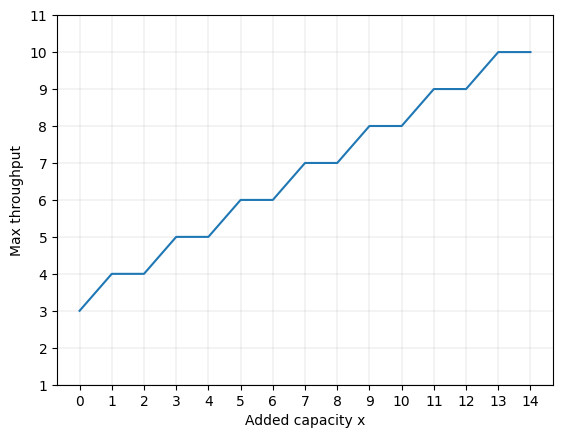

In [11]:
import matplotlib.pyplot as plt

y = [list(mt.values())[0] for mt in max_ths[:-1]]
plt.plot(np.arange(0,15), y)
plt.xlabel('Added capacity x')
plt.ylabel('Max throughput')
plt.xticks(range(0,15))
plt.yticks(range(1,12))
plt.grid(linewidth=0.2)
plt.savefig("e1c.png", format="PNG")
plt.show()

# Exercise 2
* a set of people {p1, p2, p3, p4}
* a set of books {b1, b2, b3, b4}

- p1 → {b1, b2}
- p2 → {b2, b3}
- p3 → {b1, b4}
- p4 → {b1, b2, b4}.

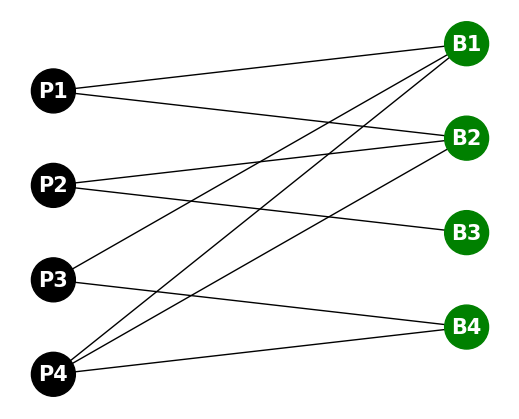

In [83]:
G = nx.Graph()
G.add_edges_from([('P1','B1'),('P1','B2'),('P2','B2'),('P2','B3'), ('P3', 'B1'),
                  ('P3', 'B4'), ('P4', 'B1'), ('P4', 'B2'), ('P4', 'B4')])

color_map = ['black' if 'P' in node else 'green' for node in G]
pos = {'P1':[0,4], 'P2':[0,2], 'P3':[0,0], 'P4':[0,-2], 'B1':[2,5], 'B2': [2, 3],
       'B3': [2, 1], 'B4': [2, -1]}

fig = plt.figure(figsize=(5,4))
nx.draw(G, pos, node_color=color_map, with_labels=True, node_size=1000,
        font_color='white', font_weight='bold', font_size=15)
plt.savefig("e2.png", format="PNG")

simple_graph = G.copy()
simple_pos = pos.copy()
simple_colormap = color_map.copy()

## 2(a)
Does a perfect matching people-books exist?
Before exploiting the max-flow problem, we need to remodel the graph:
1) we make it directed

2) we add a node origin and a node destination which are connected respectively to all the people and all the books

3) we add capacities of 1 to every link

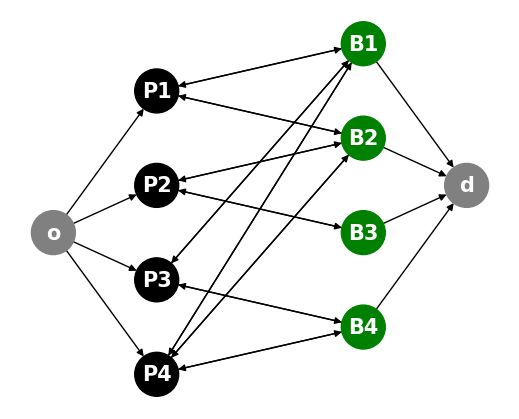

In [84]:
G = nx.DiGraph(G) # 1

for n in range(4):
    G.add_edge('o', 'P'+str(n+1)) # 2. from o to all the people
    G.add_edge('B'+str(n+1), 'd') # 2. from all the books to d

# adding to the dictionary of pos
pos['o'] = [-1, 1]
pos['d'] = [3, 2]

# o and d are the last two elements of pos
# to color them grey, we add two 'grey' at the end of color_map
for i in range(2):
    color_map.append('grey')

fig = plt.figure(figsize=(5,4))
nx.draw(G, pos, node_color=color_map, with_labels=True,
       node_size=1000, font_color='white', font_weight='bold', font_size=15)

In [85]:
# 3
for i,j in G.edges():
    G[i][j]['capacity'] = 1

The cardinality of a maximum matching is given by the min-cut capacity = max flow = throughput.
In our case it's 4 and |P|=|B|=4 means that all nodes are matched.
There exists a perfect matching of cardinality 4.

In [86]:
def get_active_edges(g, simple_g, simple_p, simple_cm):
    # maximum flow problem
    flows_to_return = nx.maximum_flow(G, "o", "d")
    links_flows = flows_to_return[1]
    # we want to use only the info of edges between people and books
    del links_flows['o']
    del links_flows['d']
    # we also delete the B keys since the P keys already contain this info
    for index in np.arange(1,5):
        del links_flows['B'+str(index)]
    # set of tuples which represent all the links between people and books, with flows > 0
    edges_to_return = set()
    for r in links_flows.items():
        for b,cap in r[1].items():
            if cap != 0:
                edges_to_return.add((r[0], b))
    # we print the new graph
    c_map = []
    for (ii, jj) in simple_graph.edges:
        if (ii, jj) in edges_to_return or (jj, ii) in edges_to_return:
            c_map.append('red')
        else:
            c_map.append('black')
    fig = plt.figure(figsize=(5,4))
    nx.draw(simple_graph, simple_pos, node_color=simple_colormap, edge_color=c_map, with_labels=True,
           node_size=1000, font_color='white', font_weight='bold', font_size=15)
    return edges_to_return, flows_to_return

({('P1', 'B2'), ('P2', 'B3'), ('P3', 'B4'), ('P4', 'B1')},
 (4,
  {'P1': {'B1': 0, 'B2': 1},
   'P2': {'B2': 0, 'B3': 1},
   'P3': {'B1': 0, 'B4': 1},
   'P4': {'B1': 1, 'B2': 0, 'B4': 0}}))

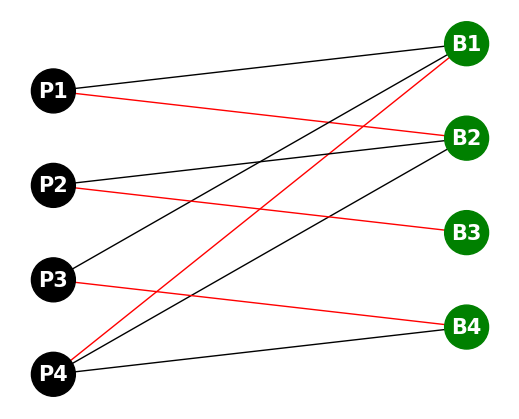

In [87]:
active_edges, flows = get_active_edges(G, simple_graph, simple_pos, simple_colormap)
active_edges, flows

## 2(b)
- Number of book copies: (2,3,2,2)
- Pi can take n different books
    for every i, for n>0

How many books can be assigned in total?

To model multiple copies of books, we put the capacity of edge $(Book_{i}, d)$ equal to the number of copies of $Book_{i}$.
Since people can choose an arbitrary number of books of interest, we put capacity of edge $(o, Person_{j}) = + inf$.
We suppose that each person can take only 1 copy of the same book, so the capacity of the edge $(Book_{i}, Person_{j})$ = 1.

The maximum flow represents the number of copies assigned to all the people.

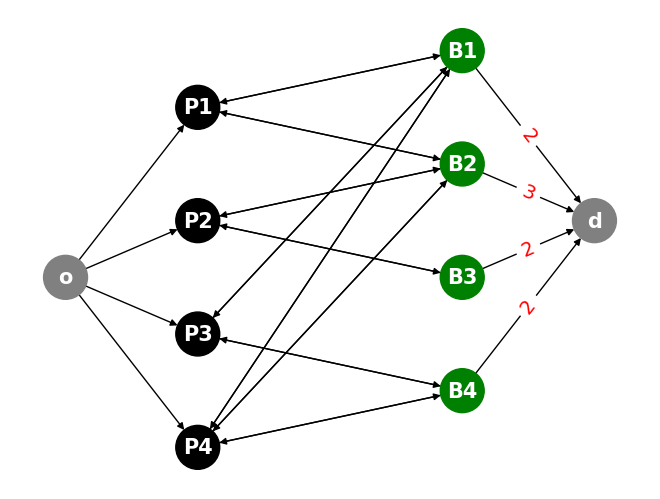

In [88]:
"""
o --> P --> B --> d
* o --> P flow is potentially infinite
* P --> B flow is <= 1
* B --> d flow is = to its number of copies
"""

# o --> P
G['o']['P1']['capacity'] = np.inf
G['o']['P2']['capacity'] = np.inf
G['o']['P3']['capacity'] = np.inf
G['o']['P4']['capacity'] = np.inf
# P --> B
G['P1']['B1']['capacity'] = 1
G['P1']['B2']['capacity'] = 1
G['P2']['B2']['capacity'] = 1
G['P2']['B3']['capacity'] = 1
G['P3']['B1']['capacity'] = 1
G['P3']['B4']['capacity'] = 1
G['P4']['B1']['capacity'] = 1
G['P4']['B2']['capacity'] = 1
G['P4']['B4']['capacity'] = 1
# B --> d
G['B1']['d']['capacity'] = 2
G['B2']['d']['capacity'] = 3
G['B3']['d']['capacity'] = 2
G['B4']['d']['capacity'] = 2

color_map = []
for node in G:
    if 'P' in node:
        color_map.append('black')
    elif 'B' in node:
        color_map.append('green')
    else:
        color_map.append('grey')

nx.draw(G, pos, with_labels = True,  node_size=1000, node_color=color_map,
        font_color='white', font_weight='bold', font_size=15)

nx.draw_networkx_edge_labels(G, pos, edge_labels={('B1','d'): '2',
                                                  ('B2','d'): '3',
                                                  ('B3','d'): '2',
                                                  ('B4','d'): '2'},
                             font_color='red', font_size=14)
plt.savefig("e2b.png", format="PNG")

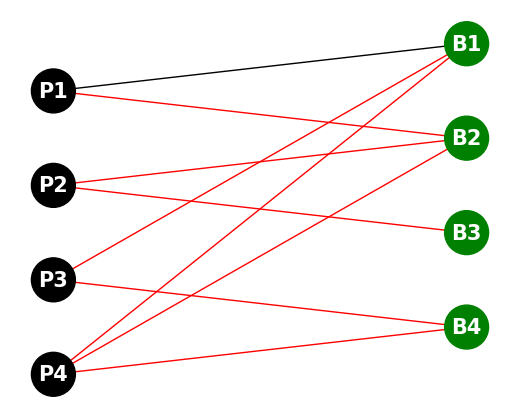

In [89]:
active_edges_2, flows_2 = get_active_edges(G, simple_graph, simple_pos, simple_colormap)
active_edges_2, flows_2
plt.savefig("e2b1.png", format="PNG")

How many books can be assigned in total? 8 = max flow
- B1 has 2 copies not 3, this is why we take off one edge from it

## 2(c)
Library:
- can sell a copy of a book
- buy a copy of another book

Which are the 2 books to **maximize the # of assigned books**?

From the previous graph, we notice that:
* P1 would like to have B1 but there are no more copies available;
* there are 2 copies of B3, but only 1 is given to a person. Only 1 person, P2, wants B3.

Taking care of these observations, we can say that if the library:
* sold 1 copy of B3
* bought 1 copy of B1

then the number of assigned books would be maximized.

{('B1', 'd'): Text(2.5, 3.5, '3'),
 ('B2', 'd'): Text(2.5, 2.5, '3'),
 ('B3', 'd'): Text(2.5, 1.5, '1'),
 ('B4', 'd'): Text(2.5, 0.5, '2')}

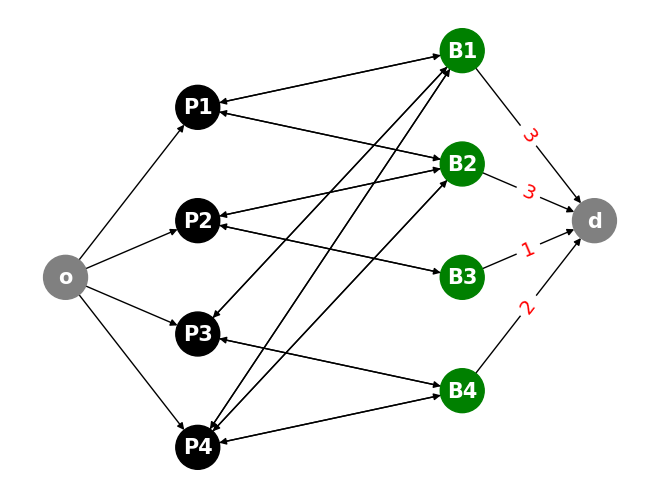

In [90]:
G['B1']['d']['capacity'] = 2+1
G['B3']['d']['capacity'] = 2-1

nx.draw(G, pos, with_labels = True,  node_size=1000, node_color=color_map,
        font_color='white', font_weight='bold', font_size=15)

nx.draw_networkx_edge_labels(G, pos, edge_labels={('B1','d'): G['B1']['d']['capacity'],
                                                  ('B2','d'): G['B2']['d']['capacity'],
                                                  ('B3','d'): G['B3']['d']['capacity'],
                                                  ('B4','d'): G['B4']['d']['capacity']},
                             font_color='red', font_size=14)

({('P1', 'B1'),
  ('P1', 'B2'),
  ('P2', 'B2'),
  ('P2', 'B3'),
  ('P3', 'B1'),
  ('P3', 'B4'),
  ('P4', 'B1'),
  ('P4', 'B2'),
  ('P4', 'B4')},
 (9,
  {'P1': {'B1': 1, 'B2': 1},
   'P2': {'B2': 1, 'B3': 1},
   'P3': {'B1': 1, 'B4': 1},
   'P4': {'B1': 1, 'B2': 1, 'B4': 1}}))

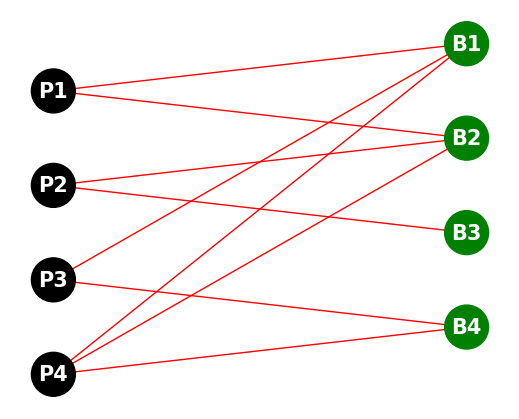

In [91]:
active_edges_3, flows_3 = get_active_edges(G, simple_graph, simple_pos, simple_colormap)
active_edges_3, flows_3

# Exercise 3

In [57]:
f = scipy.io.loadmat("flow.mat")["flow"].reshape(28,)
C = scipy.io.loadmat("capacities.mat")["capacities"].reshape(28,)
B = scipy.io.loadmat("traffic.mat")["traffic"]
l = scipy.io.loadmat("traveltime.mat")["traveltime"].reshape(28,)

In [58]:
"""
- Rows = nodes of the network
- Columns = links of the network
* i-th column = 1 in the row corresponding to the tail node
* i-th column = −1 in the row corresponding to the head node
Each node represents an intersection between highways
"""
B

array([[ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  1,  0,  0, -1,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  

In [59]:
C

array([ 8741,  9864, 13350, 10926, 13707,  6960,  7422,  6678,  6297,
       11102,  8899,  8970,  9753,  9719,  9083,  7416, 13353, 11216,
       10947, 10019,  8732, 10763,  6677,  9403, 10355,  9067, 11990,
        8258], dtype=uint16)

In [60]:
"""
Each link has a minimum travel time. The drivers experience when the road is empty.
These values are simply retrieved by dividing the length of the highway segment
with the assumed speed limit 60 miles/hour.
"""
l

# minimum travel time of links = length of the links

array([0.14583 , 0.044833, 0.129   , 0.18667 , 0.12983 , 0.078333,
       0.094   , 0.057333, 0.14167 , 0.10517 , 0.10667 , 0.10483 ,
       0.11233 , 0.1805  , 0.1215  , 0.080667, 0.075333, 0.056667,
       0.032667, 0.035   , 0.066667, 0.11283 , 0.078333, 0.054167,
       0.095833, 0.073   , 0.165   , 0.14867 ])

In [61]:
# Flow vector
f

array([ 7524,  6537, 11139,  9282,  9282,  6398,  6728,  5988,  5951,
        9557,  7423,  7423,  6814,  8536,  7652,  6537, 11924,  9640,
        8161,  8603,  7974,  9446,  5562,  6719,  9455,  6686, 10833,
        7403], dtype=uint16)

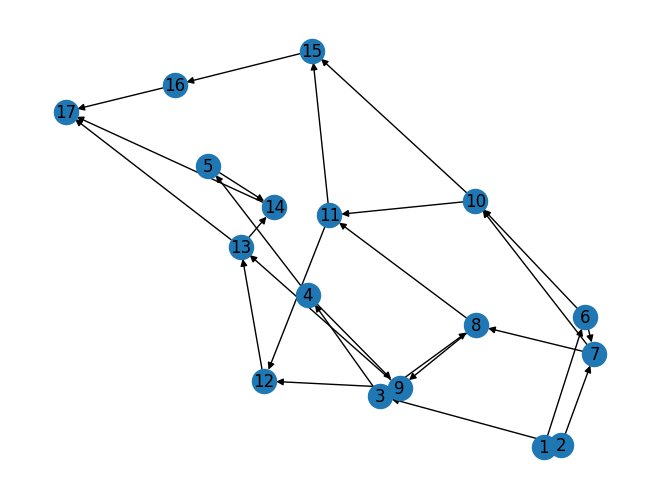

In [62]:
G = nx.DiGraph()

for j in range(B.shape[1]): # cols to consider
    for i in range(B.shape[0]): # rows = 17
        # save the node of the links
        if B[i][j] == 1: # fixed col, to check which are the i nodes of the link j
            u = i+1 # nodes start from 1, not 0
        elif B[i][j] == -1:
            v = i+1
    G.add_edge(u,v, capacity=C[j])

nx.draw(G, with_labels=True)

## (3a)
Find the shortest path = **path with shortest travel time in an empty network** between node 1 and 17.

In [63]:
n_edges = np.shape(B)[1]
# To make the network empty, we assume that in the network there is only 1 car
# entering from the first node (1) and exiting in the last node (17).
# Thus, the inflow in the node 1 is equal 1, the outflow in the node 17 is equal 1
# and all the in/outflows in the middle nodes are equal 0.
# The flow vector is a vector of length 17, where:
# - 1st component = +1 (exogenous inflow in 1)
# - last component = -1 (external outflow in 17)
nu = np.zeros(17)
nu[0] = 1
nu[-1] = -1

# Construct the problem.
flow = cp.Variable(n_edges) # scalar optimization variable
objective = cp.Minimize(l.T @ flow) # link cost functions to be minimized
constraints = [B @ flow == nu, flow >= 0] # constraints on network flow
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for f is stored in `f.value`.
optimal_flow = flow.value

rounded_optimal_flow = [round(v) for v in optimal_flow] # if 1 or 0
print("Optimal flow")
np.array(rounded_optimal_flow)

Optimal flow


array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0])

In [64]:
indexes = []
for i, rof in enumerate(rounded_optimal_flow):
    if rof == 1:
        indexes.append(i)

Optimal path from 1 to 17: [(1, 2), (2, 3), (3, 9), (9, 13), (13, 17)]


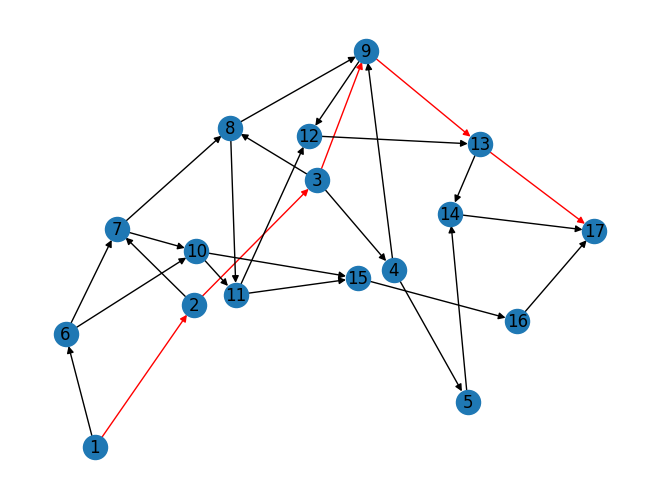

In [65]:
optimal_path = []
for j in indexes: # cols to consider
    for i in range(B.shape[0]): # rows = 17
        # save the node of the links
        if B[i][j] == 1: # fixed col, to check which are the i nodes of the link j
            u = i+1 # nodes start from 1, not 0
        elif B[i][j] == -1:
            v = i+1
    optimal_path.append((u,v))
print("Optimal path from 1 to 17:", sorted(optimal_path))

c_map = []
for (ii, jj) in G.edges:
    if (ii, jj) in optimal_path or (jj, ii) in optimal_path:
        c_map.append('red')
    else:
        c_map.append('black')

nx.draw(G, edge_color=c_map, with_labels=True)

## (3b)
**Maximum flow** between node 1 and 17

In [66]:
nx.maximum_flow(G,1,17)

(22448,
 {1: {2: 8741, 6: 13707},
  2: {3: 8741, 7: 0},
  3: {4: 0, 8: 0, 9: 8741},
  4: {5: 0, 9: 0},
  5: {14: 0},
  6: {7: 4624, 10: 9083},
  7: {8: 4624, 10: 0},
  8: {9: 4624, 11: 0},
  9: {13: 6297, 12: 7068},
  13: {14: 3835, 17: 10355},
  14: {17: 3835},
  10: {11: 825, 15: 8258},
  11: {12: 825, 15: 0},
  15: {16: 8258},
  12: {13: 7893},
  17: {},
  16: {17: 8258}})

## (3c)
**External inflow** ν, satisfying Bf = ν.

Assumption: exogenous inflow = 0 in all the nodes except for:
* $v_{1}$ which has the same value already computed
* $v_{17}$ = $-v_{1}$

In [67]:
nu_external_inflow = B @ f

In [68]:
for i in range(17):
    if i!=0 and i!=16:
        nu_external_inflow[i] = 0
    elif i==16:
        nu_external_inflow[i] = -nu_external_inflow[0]

nu_external_inflow

array([ 16806,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
       -16806], dtype=int32)

## (3d)
**Social optimum flow** $f^{*}$ w.r.t. the delays on the links.

**Cost function on each link e**: $f_{e}τ_{e}(f_{e}) = \frac{l_{e}c_{e}}{1−f_{e}/c_{e}}−l_{e}c_{e}$

*Minimize* the cost function which is the sommatory of this one above, over all the links.
The cost function is subject to the **flow constraints**: the ones of max flow problem.

In [69]:
# Construct the problem.
flow = cp.Variable(n_edges) # scalar optimization variable
# np.shape(l*C) = (28,)
# np.shape(np.ones(n_edges)-(f/C)) = (28,)
objective = cp.Minimize((cp.multiply(l,C) @ cp.inv_pos(np.ones(n_edges)-(flow/C))) - l.T @ C) # cost function
constraints = [B @ flow == nu_external_inflow, flow >= 0] # constraints on network flow
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
opt_so_flow_cost = prob.solve()
# The optimal value for f is stored in `f.value`.
social_opt_flow = flow.value

rounded_social_opt_flow = [round(v) for v in social_opt_flow]
print("Social optimum flow")
np.array(rounded_social_opt_flow)

Social optimum flow


array([ 6642,  6059,  3132,  3132, 10164,  4638,  3006,  2543,  3132,
         583,     0,  2926,     0,  3132,  5525,  2854,  4886,  2215,
         464,  2338,  3318,  5656,  2373,     0,  6414,  5505,  4886,
        4886])

In [70]:
# optimum cost of social optimum flow
opt_so_flow_cost

25943.621934951487

## (3e)
**Wardrop equilibrium $f^{(0)}$**

**Cost function on each link e**: $\int_0^{f_{e}} τ_{e}(s) \,ds$

* **Wardrop equilibrium** = solution of **UO-TAP**
* $τ_{e}(f_{e}) = \frac{l_{e}}{1-f_{e}/c_{e}}$

$\int_0^{f_{e}} τ_{e}(f_{e}) \,df_{e} = \int_0^{f_{e}} \frac{l_{e}}{1-f_{e}/c_{e}}\,df_{e} = l_{e}c_{e}log\frac{c_{e}}{c_{e}-f_{e}}$

In [71]:
flow = cp.Variable(n_edges) # scalar optimization variable
objective = cp.Minimize((l*C).T @ (cp.log(C)-cp.log(C-flow))) #transposition to adapt dimensions
constraints = [B @ flow == nu_external_inflow, flow >= 0] # constraints on network flow
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
opt_ward_eq_cost = prob.solve()
# The optimal value for f is stored in `f.value`.
wardrop_flow = flow.value

rounded_wardrop_flow = [round(v) for v in wardrop_flow] # if 1 or 0
print("Wardrop equilibrium")
np.array(rounded_wardrop_flow)

Wardrop equilibrium


array([ 6716,  6716,  2367,  2367, 10090,  4645,  2804,  2284,  3418,
           0,   177,  4171,     0,  2367,  5445,  2353,  4933,  1842,
         697,  3036,  3050,  6087,  2587,     0,  6919,  4954,  4933,
        4933])

In [72]:
# optimum cost of Wardrop equilibrium
opt_ward_eq_cost

15729.607069782058

## (3e)
**Wardrop equilibrium with tolls** $f^{(ω)}$.
* **Marginal cost toll** on link e computed at *social optimum* $f^{*}$ is defined as the derivative of the delay computed at social optimum times the social optimum: $ω_{e} = f^{*}_{e}τ^{'}_{e}(f^{*}_{e}) = f^{*}_{e}\frac{l_{e}c_{e}}{(c_e-f_e^{*})^{2}}$
* **Flow** at the *system optimum*: $f^{*}_{e}$
* **Delay** on link e: $τ_{e}(f_{e})+ω_{e}$

With marginal cost tolls $ω_{e}$ computed at social optimum $f^{*}$:
* $f^{(w)} = f^{*}$
* $f^{(w)}$ **Wardrop equilibrium** with tolls
* $f^{*}$ **social optimum**

**Cost function on each link**: $\int_0^{f_{e}} τ_{e}(s) \,ds + ω_{e}f_{e}$

In [73]:
omegas = social_opt_flow * (l*C / (C-social_opt_flow)**2) # tolls
omegas

array([1.92232140e+00, 1.85059722e-01, 5.16714630e-02, 1.05180947e-01,
       1.44063285e+00, 4.69188790e-01, 1.07572978e-01, 5.69232338e-02,
       2.78796531e-01, 6.15666745e-03, 1.51169016e-08, 7.53438984e-02,
       1.80543445e-09, 1.26664180e-01, 4.81750853e-01, 8.20565587e-02,
       6.85712139e-02, 1.73815858e-02, 1.50911427e-03, 1.38922032e-02,
       6.59003407e-02, 2.63298033e-01, 6.70032499e-02, 9.40799847e-10,
       4.09841409e-01, 2.87276032e-01, 1.91576694e-01, 5.27749097e-01])

In [74]:
flow = cp.Variable(n_edges) # scalar optimization variable
objective = cp.Minimize((l*C).T @ (cp.log(C)-cp.log(C-flow)) + omegas.T @ flow) #transposition to adapt dimensions
constraints = [B @ flow == nu_external_inflow, flow >= 0] # constraints on network flow
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
opt_ward_eq_tolls_cost = prob.solve()
# The optimal value for f is stored in `f.value`.
wardrop_flow_with_tolls = flow.value

rounded_wardrop_flow_with_tolls = [round(v) for v in wardrop_flow_with_tolls]
print("Wardrop equilibrium with tolls")
np.array(rounded_wardrop_flow_with_tolls)

Wardrop equilibrium with tolls


array([ 6642,  6059,  3132,  3132, 10164,  4638,  3006,  2542,  3132,
         583,     0,  2927,     0,  3132,  5526,  2854,  4886,  2215,
         464,  2338,  3318,  5656,  2373,     0,  6414,  5505,  4886,
        4886])

In [75]:
# optimum cost of Wardrop flow with tolls
opt_ward_eq_tolls_cost

61885.96858611895

In [76]:
# compare Wardrop equilibrium without and with tolls
import pandas as pd
df_flows = pd.DataFrame()
df_flows['Edge'] = np.arange(1,29)
df_flows['Social optimum flow'] = rounded_social_opt_flow
df_flows['Wardrop equilibrium'] = rounded_wardrop_flow
df_flows['Wardrop equilibrium with tolls'] = rounded_wardrop_flow_with_tolls

In [77]:
print(df_flows.to_latex(index=False, multirow=True))

\begin{tabular}{rrrr}
\toprule
 Edge &  Social optimum flow &  Wardrop equilibrium &  Wardrop equilibrium with tolls \\
\midrule
    1 &                 6642 &                 6716 &                            6642 \\
    2 &                 6059 &                 6716 &                            6059 \\
    3 &                 3132 &                 2367 &                            3132 \\
    4 &                 3132 &                 2367 &                            3132 \\
    5 &                10164 &                10090 &                           10164 \\
    6 &                 4638 &                 4645 &                            4638 \\
    7 &                 3006 &                 2804 &                            3006 \\
    8 &                 2543 &                 2284 &                            2542 \\
    9 &                 3132 &                 3418 &                            3132 \\
   10 &                  583 &                    0 &                 

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_11132\2903507178.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_flows.to_latex(index=False, multirow=True))


As expected, social optimum flow equals Wardrop equilibrium with tolls.

## (3f)
**System optimum $f^{*}$**

**Cost function on each link e**: $f_{e}(τ_{e}(f_{e})−l_{e}) = \frac{l_{e}c_{e}}{1−f_{e}/c_{e}}−l_{e}c_{e}-l_{e}f_{e}$

In [78]:
# Construct the problem.
flow = cp.Variable(n_edges) # scalar optimization variable
# np.shape(l*C) = (28,)
# np.shape(np.ones(n_edges)-(f/C)) = (28,)
objective = cp.Minimize((cp.multiply(l,C) @ cp.inv_pos(np.ones(n_edges)-(flow/C))) - l.T @ C - l.T @ flow) # cost function
constraints = [B @ flow == nu_external_inflow, flow >= 0] # constraints on network flow
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
opt_so2_flow_cost_2 = prob.solve()
# The optimal value for f is stored in `f.value`.
social_opt_flow_2 = flow.value

rounded_social_opt_flow_2 = [round(v) for v in social_opt_flow_2]
print("Social optimum flow")
np.array(rounded_social_opt_flow_2)

Social optimum flow


array([ 6653,  5775,  3420,  3420, 10153,  4643,  3106,  2662,  3009,
         879,     0,  2355,     0,  3420,  5510,  3044,  4882,  2415,
         444,  2008,  3487,  5495,  2204,     0,  6301,  5624,  4882,
        4882])

**Wardrop equilibrium** with tolls $f^{(w)}$

Construct **tolls** $w^{*}$ s.t.
* $f^{*} = f^{(w^{*})}$ which means that **social optimum** equals **Wardrop equilibrium**

* **Wardrop equilibrium** = solution of **UO-TAP**
* $τ_{e}(f_{e}) = \frac{l_{e}}{1-f_{e}/c_{e}}-l_{e}$
$\int_0^{f_{e}} τ_{e}(f_{e}) \,df_{e} = \int_0^{f_{e}} (\frac{l_{e}}{1-f_{e}/c_{e}}-l_{e})\,df_{e} = -l_{e}(c_{e}\,log(f_{e}-c{e})+f_{e}) = l_{e}c_{e}\,log(c_{e}-f_{e})-l_{e}f_{e}$

* **Marginal cost toll** on link e computed at *social optimum* $f^{*}$ is defined as the derivative of the delay computed at social optimum times the social optimum: $ω_{e} = f^{*}_{e}τ^{'}_{e}(f^{*}_{e}) = f^{*}_{e}\frac{l_{e}c_{e}}{(c_e-f_e^{*})^{2}}$
* **Flow** at the *system optimum*: $f^{*}_{e}$
* **Delay** on link e: $τ_{e}(f_{e})+ω_{e}$

**Cost function on each link**: $\int_0^{f_{e}} τ_{e}(s) \,ds + ω_{e}f_{e} = l_{e}c_{e}\,log(c_{e}-f_{e})-l_{e}f_{e}+ ω_{e}f_{e}$

In [79]:
#construct tolls to satisfy the condition
omegas = social_opt_flow_2 * (l*C / (C-social_opt_flow_2)**2)

In [80]:
flow = cp.Variable(n_edges) # scalar optimization variable
objective = cp.Minimize((l*C).T @ (cp.log(C)-cp.log(C-flow)) -l.T @ flow + omegas.T @ flow) #transposition to adapt dimensions
constraints = [B @ flow == nu_external_inflow, flow >= 0] # constraints on network flow
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
opt_ward_eq_tolls_cost_2 = prob.solve()
# The optimal value for f is stored in `f.value`.
wardrop_flow_with_tolls_2 = flow.value

rounded_wardrop_flow_with_tolls_2 = [round(v) for v in wardrop_flow_with_tolls_2]
print("Wardrop equilibrium with tolls")
np.array(rounded_wardrop_flow_with_tolls_2)

Wardrop equilibrium with tolls


array([ 6653,  5775,  3419,  3419, 10153,  4643,  3105,  2662,  3009,
         878,     0,  2356,     0,  3419,  5510,  3043,  4882,  2415,
         444,  2009,  3487,  5496,  2204,     0,  6301,  5623,  4882,
        4882])

In [81]:
df_flows_2 = pd.DataFrame()
df_flows_2['Edge'] = np.arange(1,29)
df_flows_2['Social optimum flow'] = rounded_social_opt_flow_2
df_flows_2['Wardrop equilibrium with tolls'] = rounded_wardrop_flow_with_tolls_2

df_flows_2

,Edge,Social optimum flow,Wardrop equilibrium with tolls
0,1,6653,6653
1,2,5775,5775
2,3,3420,3419
3,4,3420,3419
4,5,10153,10153
5,6,4643,4643
6,7,3106,3105
7,8,2662,2662
8,9,3009,3009
9,10,879,878


In [82]:
print(df_flows_2.to_latex(index=False, multirow=True))

\begin{tabular}{rrr}
\toprule
 Edge &  Social optimum flow &  Wardrop equilibrium with tolls \\
\midrule
    1 &                 6653 &                            6653 \\
    2 &                 5775 &                            5775 \\
    3 &                 3420 &                            3419 \\
    4 &                 3420 &                            3419 \\
    5 &                10153 &                           10153 \\
    6 &                 4643 &                            4643 \\
    7 &                 3106 &                            3105 \\
    8 &                 2662 &                            2662 \\
    9 &                 3009 &                            3009 \\
   10 &                  879 &                             878 \\
   11 &                    0 &                               0 \\
   12 &                 2355 &                            2356 \\
   13 &                    0 &                               0 \\
   14 &                 3420 &       

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_11132\749157959.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_flows_2.to_latex(index=False, multirow=True))
